## Sect2. Linear Regression

In [1]:
from IPython.display import Image

### Hypothesis and cost function
$$H(x) = Wx+b$$ $$cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

### TensorFlow Mechanics
- Build graph using TF operations
- Run graph and get results
- Update graph and get results

### Ex1. Variable 사용
$$H(x) = Wx+b$$

x, y 값이 주어졌을 때, W, b 값을 예측하기

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [2]:
from tqdm import tqdm_notebook
import tensorflow as tf

# X and Y data
x_train = [1,2,3,4]
y_train = [1,2,3,4]

# TF 변수 선언(1차원 랜던숫자로)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W +b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [4]:
# Fit the Line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step <5:
        print("step={step}, \t cost = {cost_val}, \t W = {W_val}, \t b = {b_val}".format(
             step = step,
             cost_val = sess.run(cost),
             W_val = sess.run(W),
             b_val = sess.run(b)
             ));

step=0, 	 cost = 0.5538294911384583, 	 W = [0.9344387], 	 b = [-0.5766753]
step=1, 	 cost = 0.3966670632362366, 	 W = [0.9731067], 	 b = [-0.5618637]
step=2, 	 cost = 0.28754156827926636, 	 W = [1.0052339], 	 b = [-0.5492818]
step=3, 	 cost = 0.21174795925617218, 	 W = [1.0319129], 	 b = [-0.5385578]
step=4, 	 cost = 0.15908338129520416, 	 W = [1.0540539], 	 b = [-0.52938235]
step=200, 	 cost = 0.01242803130298853, 	 W = [1.0927817], 	 b = [-0.27278897]
step=400, 	 cost = 0.003745653899386525, 	 W = [1.0509359], 	 b = [-0.14975788]
step=600, 	 cost = 0.0011288963723927736, 	 W = [1.0279633], 	 b = [-0.0822153]
step=800, 	 cost = 0.00034023344051092863, 	 W = [1.0153514], 	 b = [-0.04513507]
step=1000, 	 cost = 0.0001025426754495129, 	 W = [1.0084277], 	 b = [-0.02477857]
step=1200, 	 cost = 3.090397149208002e-05, 	 W = [1.0046266], 	 b = [-0.01360304]
step=1400, 	 cost = 9.314696399087552e-06, 	 W = [1.00254], 	 b = [-0.00746798]
step=1600, 	 cost = 2.8078056857339107e-06, 	 W = [1.001

### Ex2. Plaeholder 사용
데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [5]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [7]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3, 4], 
                                                    Y: [1, 2, 3, 4]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=2.0651359591283835e-06, 	 W=[1.0012139], 	 b=[-0.00286914]
step=1, 	 cost=1.8693574475037167e-06, 	 W=[1.0011753], 	 b=[-0.00287245]
step=2, 	 cost=1.730900066831964e-06, 	 W=[1.0011426], 	 b=[-0.00287377]
step=3, 	 cost=1.6322401279467158e-06, 	 W=[1.001115], 	 b=[-0.00287343]
step=4, 	 cost=1.5613579762430163e-06, 	 W=[1.0010914], 	 b=[-0.00287171]
step=200, 	 cost=4.3866180021723267e-07, 	 W=[1.0005497], 	 b=[-0.00161564]
step=400, 	 cost=1.3241576368727692e-07, 	 W=[1.0003018], 	 b=[-0.00088773]
step=600, 	 cost=4.003391040896531e-08, 	 W=[1.0001662], 	 b=[-0.00048798]
step=800, 	 cost=1.2098291257700566e-08, 	 W=[1.0000914], 	 b=[-0.00026841]
step=1000, 	 cost=3.6688634352799454e-09, 	 W=[1.0000504], 	 b=[-0.00014778]
step=1200, 	 cost=1.107395952715251e-09, 	 W=[1.0000275], 	 b=[-8.124621e-05]
step=1400, 	 cost=3.3312375080640777e-10, 	 W=[1.0000153], 	 b=[-4.4551503e-05]
step=1600, 	 cost=1.1006662248291832e-10, 	 W=[1.000009], 	 b=[-2.553673e-05]
step=1800, 	 cos

In [8]:
W_val, W_val[0], type(W_val[0])

(array([1.0000038], dtype=float32), 1.0000038, numpy.float32)

In [9]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[-1.0590578e-05]', -1.0590578312985599e-05)

### Ex3. Plaeholder 사용
exptected : W=1, b=1.1

- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

In [10]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=1.2099978923797607, 	 W=[1.0660036],  	 b=[0.02198939]
step=1, 	 cost=0.783112645149231, 	 W=[1.1161634],  	 b=[0.03958939]
step=2, 	 cost=0.5338184833526611, 	 W=[1.154232],  	 b=[0.0538278]
step=3, 	 cost=0.3880193829536438, 	 W=[1.1830713],  	 b=[0.06549732]
step=4, 	 cost=0.3025353252887726, 	 W=[1.2048657],  	 b=[0.07520309]
step=5, 	 cost=0.25220370292663574, 	 W=[1.2212831],  	 b=[0.08340709]
step=6, 	 cost=0.22236041724681854, 	 W=[1.2335963],  	 b=[0.09046196]
step=7, 	 cost=0.20446038246154785, 	 W=[1.2427775],  	 b=[0.09663694]
step=8, 	 cost=0.1935235559940338, 	 W=[1.2495682],  	 b=[0.10213756]
step=9, 	 cost=0.18664811551570892, 	 W=[1.254535],  	 b=[0.10712072]
step=100, 	 cost=0.09650231897830963, 	 W=[1.2010001],  	 b=[0.3743261]
step=200, 	 cost=0.04902006313204765, 	 W=[1.1432564],  	 b=[0.5827988]
step=300, 	 cost=0.024900607764720917, 	 W=[1.1021016],  	 b=[0.7313809]
step=400, 	 cost=0.012648699805140495, 	 W=[1.0727696],  	 b=[0.8372785]
step=500, 

### Ex4. Linear Regression

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 300
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = w*x +b + np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

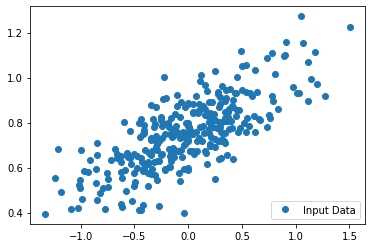

In [16]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [17]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


 y = [0.51787966] x + [0.7589786] 


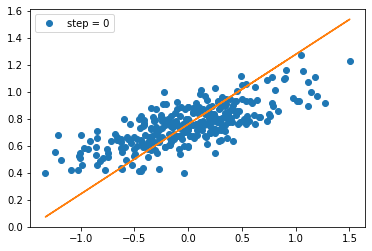


 y = [0.44665787] x + [0.75769234] 


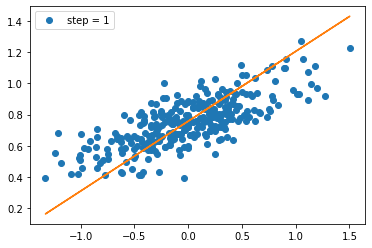


 y = [0.39339438] x + [0.7568395] 


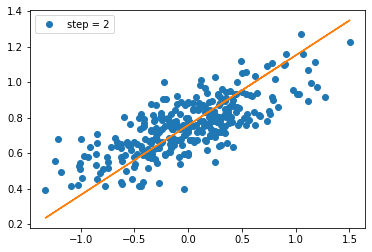


 y = [0.35356236] x + [0.75620174] 


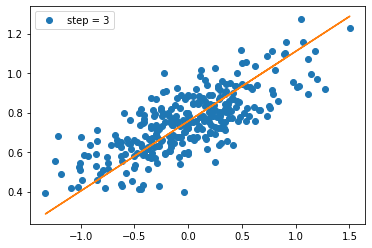


 y = [0.3237748] x + [0.7557247] 


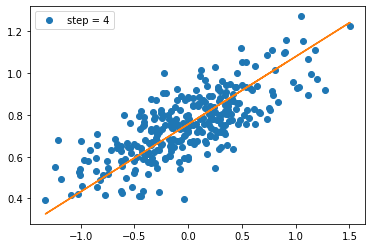


 y = [0.23543781] x + [0.7543103] 


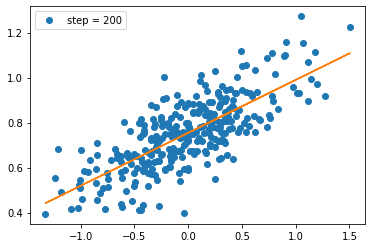


 y = [0.23543781] x + [0.7543103] 


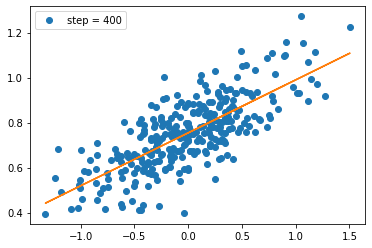


 y = [0.23543781] x + [0.7543103] 


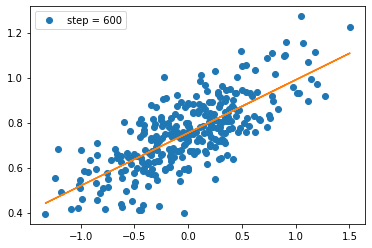


 y = [0.23543781] x + [0.7543103] 


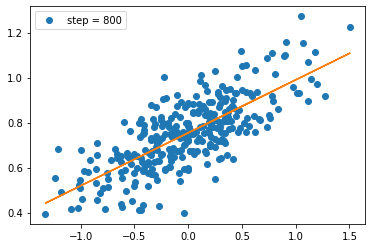


 y = [0.23543781] x + [0.7543103] 


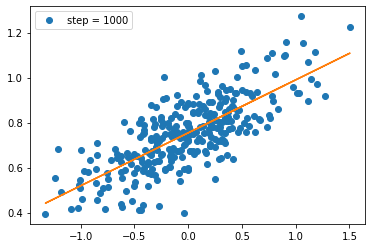


 y = [0.23543781] x + [0.7543103] 


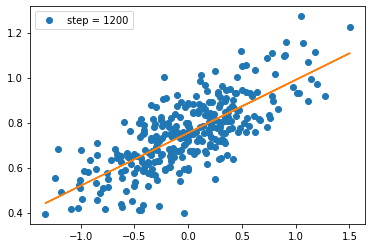


 y = [0.23543781] x + [0.7543103] 


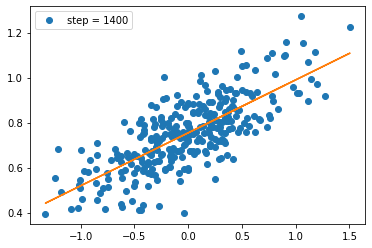


 y = [0.23543781] x + [0.7543103] 


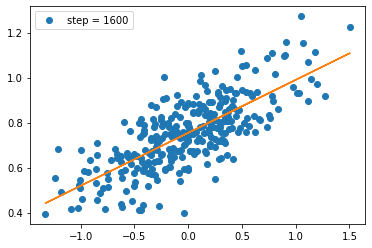


 y = [0.23543781] x + [0.7543103] 


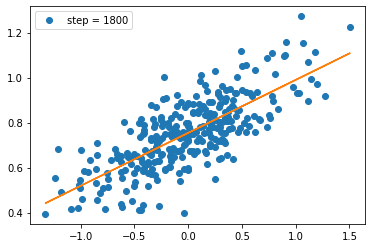


 y = [0.23543781] x + [0.7543103] 


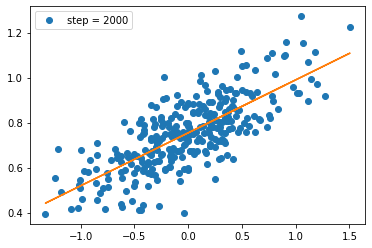

In [18]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()